In [100]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("C:\iris_data.csv")
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [102]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [104]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [105]:
df.isnull().sum()


Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

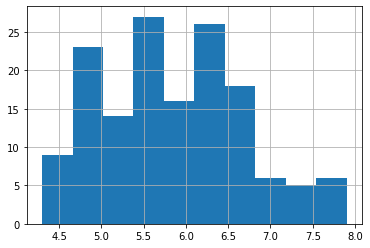

In [106]:
df['Sepal.Length'].hist()

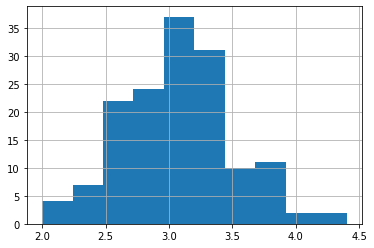

In [107]:
df['Sepal.Width'].hist()

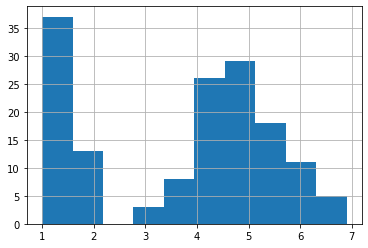

In [108]:
df['Petal.Length'].hist()

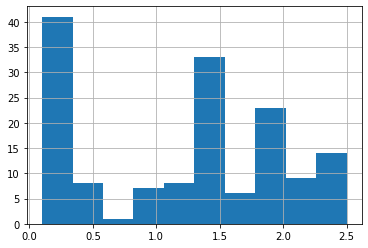

In [109]:
df['Petal.Width'].hist()

In [110]:
colors = ['red', 'orange', 'blue']
species = ['setosa','versicolor','virginica']

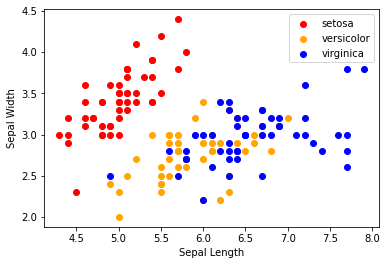

In [111]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['Sepal.Length'], x['Sepal.Width'], c = colors[i], label=species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.legend()

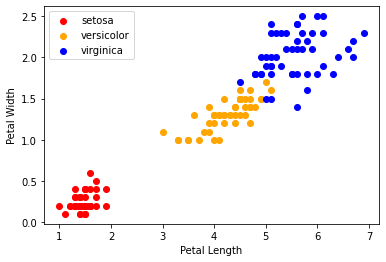

In [112]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['Petal.Length'], x['Petal.Width'], c = colors[i], label=species[i])
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.legend()

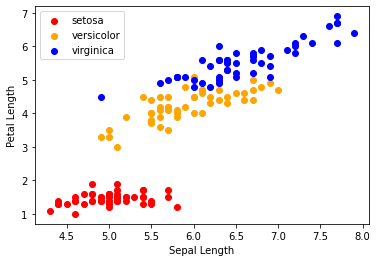

In [113]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['Sepal.Length'], x['Petal.Length'], c = colors[i], label=species[i])
  plt.xlabel('Sepal Length')
  plt.ylabel('Petal Length')
  plt.legend()

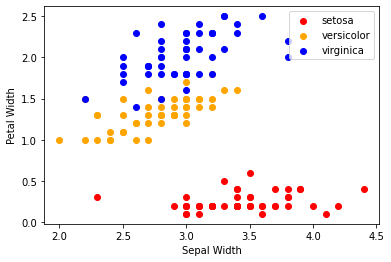

In [114]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['Sepal.Width'], x['Petal.Width'], c = colors[i], label=species[i])
  plt.xlabel('Sepal Width')
  plt.ylabel('Petal Width')
  plt.legend()

In [115]:
df.corr()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000


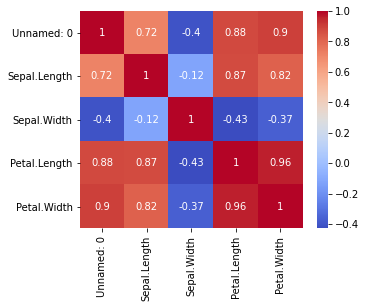

In [116]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [118]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [119]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [121]:
model.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [123]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [124]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
 print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [126]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()



In [127]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [128]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
